# Contents

## 01 Import libraries and data

## 02 Data inspection and cleaning

### 02.1 Dimensions and descriptive statistics

### 02.2 Data cleaning

### 02.3 Exploring relationships

## 03 Regression analysis to predict sale prices

### 03.1 Regression analysis incl. extreme values

### 03.2 Regression analysis excl. extreme values

### 03.3 Regression analysis for residential unit-only sales

### 03.4 Regression analysis for sales incl. commercial units

### 03.5 Regression analysis for segment of datapoints with max. number of total units 100 and max. sale price 250,000,000

### 03.6 Regression analysis for segment of datapoints with max. number of total units 50 and max. sale price 100,000,000

### 03.7 Regression analysis for segment of datapoints with max. number of total units 50, minimum number of total units 2, and max. sale price 100,000,000

# 01 Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure graphs are displayes without needing to call them
%matplotlib inline

In [3]:
# Define path in preparation of data import
path = r'/Users/DanielaDietmayr/Library/CloudStorage/OneDrive-Personal/2023-05-07_NYC property sales/02_Data/02_Prepared data'

In [4]:
# Import data data 
df = pd.read_pickle(os.path.join(path, '2023-05-28_df.pkl'))

# 02 Data inspection and cleaning

## 02.1 Dimensions and descriptive statistics

In [5]:
# Get dimensions of df
df.shape

(1665722, 19)

In [6]:
# Get variables and datatypes in df
df.dtypes

borough_code                              object
neighborhood                              object
building_class_category                   object
tax_class_at_present                      object
easement                                  object
building_class_at_present                 object
residential_units                          int64
commercial_units                           int64
total_units                                int64
land_square_feet                         float64
gross_square_feet                        float64
year_built                                 int64
tax_class_at_time_of_sale                 object
building_class_at_time_of_sale            object
sale_price                               float64
sale_date                         datetime64[ns]
sale_price_flag                           object
borough_name                              object
sale_price_cat                            object
dtype: object

In [7]:
# Inspect head of df
df.head(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,sale_price_cat
0,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A5,1,0,1,3654.0,910.0,2002,1,A5,764000.0,2022-06-30,nan,Staten Island,medium
1,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,7654.0,2277.0,1980,1,A1,1098000.0,2022-08-19,nan,Staten Island,high
2,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A1,1,0,1,13320.0,4696.0,1985,1,A1,0.0,2022-04-20,transf_ownership,Staten Island,zero
3,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,8190.0,1528.0,1970,1,A2,890000.0,2022-01-03,nan,Staten Island,high
4,5,ANNADALE,01 ONE FAMILY DWELLINGS,1,NaN,A2,1,0,1,10500.0,2278.0,1980,1,A2,0.0,2022-12-27,transf_ownership,Staten Island,zero


In [8]:
# Inspect tail of df
df.tail(5)

,borough_code,neighborhood,building_class_category,tax_class_at_present,easement,building_class_at_present,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,sale_price_flag,borough_name,sale_price_cat
1916225,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,NaN,D4,1,0,1,1975.0,1346.0,1958,2,D4,195000.0,2023-02-15,nan,Bronx,low
1916243,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,NaN,D4,1,0,1,1975.0,1346.0,1958,2,D4,220000.0,2023-03-09,nan,Bronx,low
1916245,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,NaN,D4,1,0,1,1975.0,1346.0,1957,2,D4,250000.0,2023-02-02,nan,Bronx,low
1916253,2,WOODLAWN,10 COOPS - ELEVATOR APARTMENTS,2,NaN,D4,1,0,1,1975.0,1346.0,1957,2,D4,114500.0,2023-03-01,nan,Bronx,low
1916259,2,WOODLAWN,22 STORE BUILDINGS,4,NaN,K1,0,1,1,9699.0,3400.0,1970,4,K1,0.0,2022-12-12,transf_ownership,Bronx,zero


In [9]:
# Get descriptive statistics on variables in df
df.describe()

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price
count,1.665722e+06,1.665722e+06,1.665722e+06,1.665722e+06,1.665722e+06,1.665722e+06,1.665722e+06
mean,2.509923e+00,2.403853e-01,2.759210e+00,3.710365e+03,4.272111e+03,1.948715e+03,9.438209e+05
std,3.442822e+01,7.740843e+00,3.538551e+01,2.959178e+05,4.246420e+04,3.367233e+01,1.158814e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.648000e+03,0.000000e+00
25%,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.925000e+03,0.000000e+00
50%,1.000000e+00,0.000000e+00,1.000000e+00,1.980000e+03,1.404000e+03,1.940000e+03,3.500000e+05
75%,2.000000e+00,0.000000e+00,2.000000e+00,2.900000e+03,2.430000e+03,1.969000e+03,6.800000e+05
max,2.081100e+04,4.964000e+03,2.081100e+04,2.147557e+08,1.496215e+07,2.022000e+03,4.111112e+09


## 02.2 Data cleaning

In [10]:
# Get number of rows with sale_price = 0
len(df[df['sale_price']==0])

483934

In [11]:
# Remove ownership transfers with sale_price = 0 in preparation of building a model to predict sale prices
df = df[df['sale_price']!=0]

In [12]:
# Get shape of df after dropping ownership transfers
df.shape

(1181788, 19)

In [13]:
# Get new descriptive statistics
df.describe()

,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price
count,1.181788e+06,1.181788e+06,1.181788e+06,1.181788e+06,1.181788e+06,1.181788e+06,1.181788e+06
mean,2.283821e+00,1.958304e-01,2.485898e+00,3.431981e+03,3.894395e+03,1.949820e+03,1.330309e+06
std,3.111323e+01,7.304392e+00,3.206491e+01,2.866194e+05,3.934287e+04,3.374881e+01,1.373898e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.648000e+03,1.000000e+00
25%,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.925000e+03,3.125000e+05
50%,1.000000e+00,0.000000e+00,1.000000e+00,1.975000e+03,1.346000e+03,1.945000e+03,5.200000e+05
75%,2.000000e+00,0.000000e+00,2.000000e+00,2.600000e+03,2.176000e+03,1.970000e+03,8.566870e+05
max,2.081100e+04,4.964000e+03,2.081100e+04,2.147557e+08,1.496215e+07,2.022000e+03,4.111112e+09


In [14]:
# Check number of rows with residential_units = 0
len(df[df['residential_units']==0])

309295

In [15]:
# Check number of rows with commercial_units = 0
len(df[df['commercial_units']==0])

1098321

In [16]:
# Check number of rows with total_units = 0
len(df[df['total_units']==0])

260008

With total_units having the fewest number of rows with a value of 0, this seems to be the most suitable variable to use in a model to predict sale prices (as it keeps the number of observations high).

In [17]:
# Keep only rows with values !=0 in total_units
df=df[df['total_units']!=0]

In [18]:
# Get dimensions of df after dropping rows
df.shape

(921780, 19)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

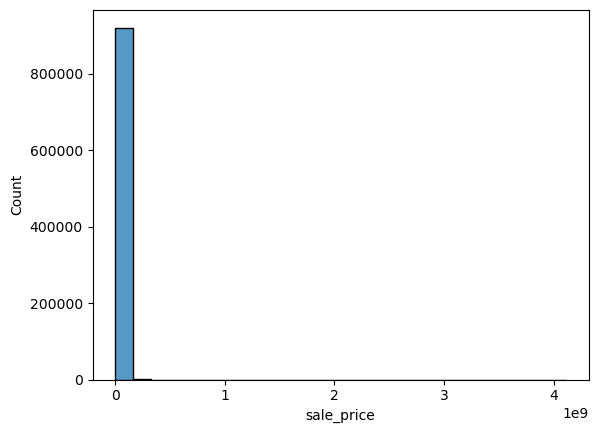

In [19]:
# Check distribution of sale_price
sns.histplot(df['sale_price'], bins=25)

<AxesSubplot:xlabel='total_units', ylabel='Count'>

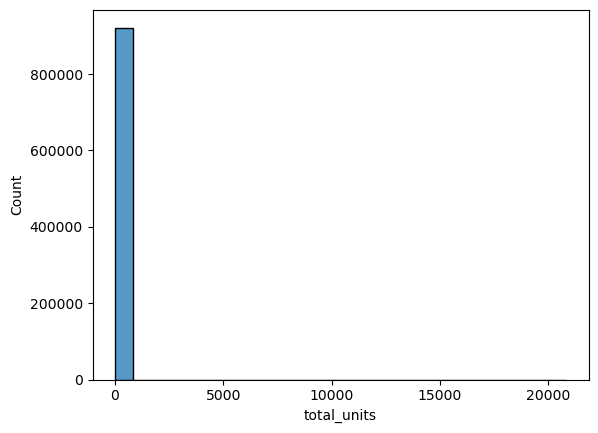

In [20]:
# Check distribution of total_units
sns.histplot(df['total_units'], bins=25)

In [21]:
# Define function identifying outliers based on empirical rule
def find_outliers_std(df):
    two_std = df.std()*2
    outliers = df[(df<(np.mean(df)-two_std)) | (df>(np.mean(df)+two_std))]
    return outliers

In [22]:
# Get outliers in sale_price
find_outliers_std(df['sale_price'])

4225       51000000.0
6346       45600000.0
6347       45600000.0
6348       45600000.0
6834       57000000.0
              ...    
1914615    57044793.0
1914616    57044793.0
1914617    57044793.0
1915659    32300524.0
1915663    32300524.0
Name: sale_price, Length: 3465, dtype: float64

In [23]:
# Get outliers in total_units
find_outliers_std(df['total_units'])

14164       83
14912      153
14933      110
14934      115
14935      117
          ... 
1911854     76
1912070    111
1912494     81
1912495     81
1915662     78
Name: total_units, Length: 3687, dtype: int64

In [24]:
# Define outliers for sale_price
two_std = df['sale_price'].std()*2
# Store outliers in df_outl_sale_price
df_outl_sale_price = df[((df['sale_price']<(np.mean(df['sale_price'])-two_std)) | (df['sale_price']>(np.mean(df['sale_price'])+two_std)))]

# Define outliers for total_units
two_std = df['total_units'].std()*2
# Store outliers in df_outl_tot_units
df_outl_tot_units = df[((df['total_units']<(np.mean(df['total_units'])-two_std)) | (df['total_units']>(np.mean(df['total_units'])+two_std)))]

In [25]:
# Create list of outlier dfs
outlier_list = [df_outl_sale_price, df_outl_tot_units]

# Concatenate outlier dfs
outliers = pd.concat(outlier_list)

In [26]:
# Get shape of outlier df
outliers.shape

(7152, 19)

In [27]:
# Drop duplicates from outliers
outliers.drop_duplicates(inplace=True)

# Get dimensions of outliers
outliers.shape

(6067, 19)

In [28]:
# Get dimensions of df before dropping
df.shape

(921780, 19)

In [29]:
# Drop outliers from df
df.drop(outliers.index, axis=0, inplace=True)

# Get dimensions of df after dropping
df.shape

(915713, 19)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

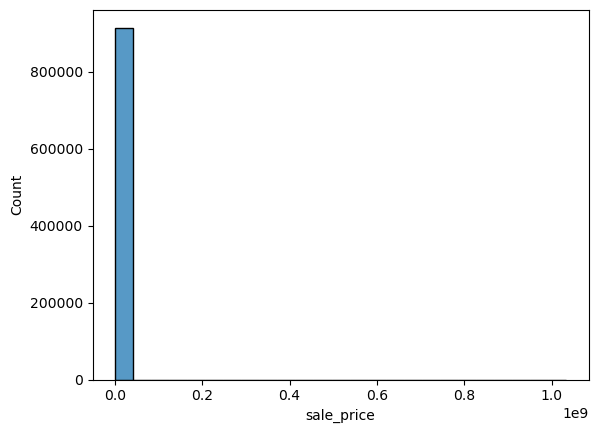

In [30]:
# Check distribution of sale_price again
sns.histplot(df['sale_price'], bins=25)

<AxesSubplot:xlabel='total_units', ylabel='Count'>

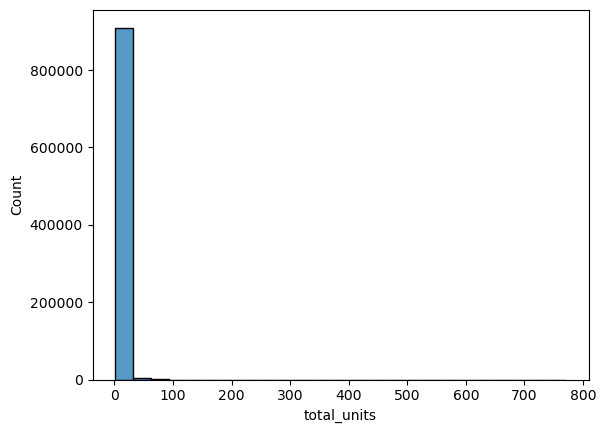

In [31]:
# Check distribution of total_units again
sns.histplot(df['total_units'], bins=25)

The histograms show that removing outliers based on empirical rule has left many extreme values in the dataset. It may turn out to be necessary to remove outliers with a stricter approach, e.g. based on IQR instead of empirical rule. 

## 02.3 Exploring relationships

Text(0, 0.5, 'Sale price')

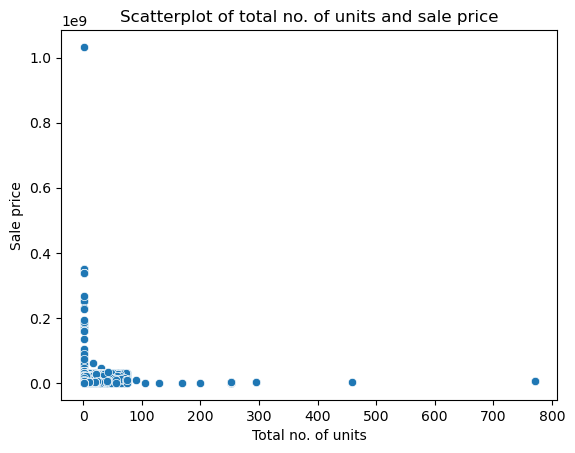

In [32]:
# Create scatterplot of total_units against sale_price
# Create plot
sns.scatterplot(data=df, x='total_units', y='sale_price')

# Add title
plt.title('Scatterplot of total no. of units and sale price')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

The scatterplot confirms what the histograms showed: there are still many extreme values in the dataset. Against this background, I'll first train a model on the dataset in its current shape. Then, I'll clean the dataset with a stricter approach (based on IQR instead of empirical rule) and train a second model to see whether it performs better. 

My hypothesis is as follows:
The higher the total number of units in a building, the higher its price. 

# 03 Regression analysis to predict sale prices

## 03.1 Regression analysis incl. extreme values

In [33]:
# Reshape variables into arrays
X = df['total_units'].values.reshape(-1,1)
y = df['sale_price'].values.reshape(-1,1)

In [34]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
# Create regression object
regression = LinearRegression()

In [36]:
# Fit regression object onto train sets
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predict sale_prices from test set
y_predicted = regression.predict(X_test)

Text(0, 0.5, 'Sale price')

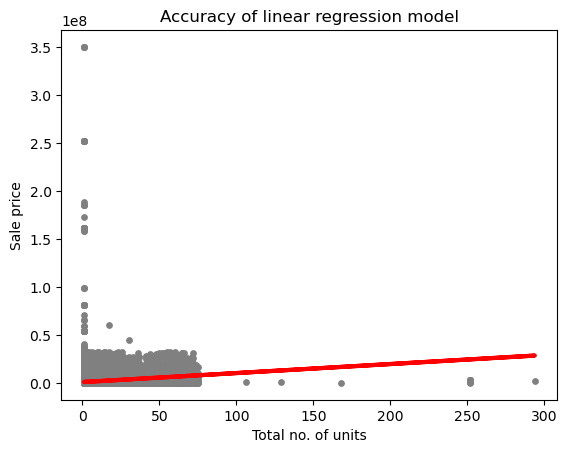

In [38]:
# Create scatterplot to visualise accuracy of regression model
# Create scatterplot with test data
plt.scatter(X_test, y_test, color='gray', s=15)

# Create regression line with predicted values
plt.plot(X_test, y_predicted, color='red', linewidth=3)

# Add title 
plt.title('Accuracy of linear regression model')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

The regression line does not fit the datapoints of the scatterplot very well. Not only does it fail to predict some very high prices for buildings with a low number of units, it also fails to accurately predict lower prices towards the lower end of the total number of units.

In [39]:
# Get model performance statistics
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [40]:
# Print model performance statistics
print('Slope :', regression.coef_)
print('Root mean squared error :', rmse)
print('R2 score :', r2)

Slope : [[93932.54385089]]
Root mean squared error : 12156666802317.541
R2 score : 0.022330870170154893


In [41]:
# Compare y_test to y_predicted
data = pd.DataFrame({'Actual sale_price' : y_test.flatten(), 'Predicted sale_price' : y_predicted.flatten()})
data.head(15)

,Actual sale_price,Predicted sale_price
0,950000.0,1.057441e+06
1,920000.0,9.635090e+05
2,440000.0,1.057441e+06
3,740000.0,9.635090e+05
4,284000.0,9.635090e+05
5,1128000.0,9.635090e+05
6,12000.0,9.635090e+05
7,1315000.0,9.635090e+05
8,175000.0,9.635090e+05
9,314240.0,9.635090e+05


The model performs very badly. While the high slope does confirm that generally, prices increase as the total number of units increases, the very high root mean squared error shows that the difference between actual and predicted values is immense. The relatively low R2 score of the model that there's a high variance in the data, and that the model fits the data poorly (only ca. 2% of the data is accurately predicted). Lastly, by purely comparing actual sale prices with predicted sale prices, one can see that the model does not predict prices very well. 

## 03.2 Regression analysis excl. extreme values

In [42]:
# Re-import original data
df2 = pd.read_pickle(os.path.join(path, '2023-05-28_df.pkl'))

In [43]:
# Get dimensions of df2
df2.shape

(1665722, 19)

In [44]:
# Get number of rows with sale_price = 0
len(df2[df2['sale_price']==0])

483934

In [45]:
# Remove ownership transfers with sale_price = 0 in preparation of building a model to predict sale prices
df2 = df2[df2['sale_price']!=0]

In [46]:
# Get shape of df2 after dropping ownership transfers
df2.shape

(1181788, 19)

In [47]:
# Check number of rows with total_units = 0
len(df2[df2['total_units']==0])

260008

In [48]:
# Keep only rows with values !=0 in total_units
df2 = df2[df2['total_units']!=0]

In [49]:
# Get shape of df2 after dropping
df2.shape

(921780, 19)

In [50]:
# Identify outliers based on IQR
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [51]:
# Identify outliers in sale_price
find_outliers_IQR(df2['sale_price'])

90         1952799.0
115        2250000.0
116        2025000.0
117        2300000.0
118        2585000.0
             ...    
1915806    3900000.0
1916147    7500000.0
1916150    4947000.0
1916151    4947000.0
1916211    1800000.0
Name: sale_price, Length: 101652, dtype: float64

In [52]:
# Identify outliers in total_units
find_outliers_IQR(df2['total_units'])

527         8
529         4
530         4
929        72
932         5
           ..
1916111     6
1916118     4
1916120     5
1916137     5
1916211     9
Name: total_units, Length: 67601, dtype: int64

In [53]:
# Define outliers for sale_price
q1 = df2['sale_price'].quantile(0.25)
q3 = df2['sale_price'].quantile(0.75)
IQR = q3-q1

# Store outliers in df2_outl_sale_price
df2_outl_sale_price = df2[((df2['sale_price']<(q1-1.5*IQR)) | (df2['sale_price']>(q3+1.5*IQR)))]

# Get dimensions of df2_outl_sale_price
df2_outl_sale_price.shape

(101652, 19)

In [54]:
# Define outliers for total_units
q1 = df2['total_units'].quantile(0.25)
q3 = df2['total_units'].quantile(0.75)
IQR = q3-q1

# Store outliers in df2_outl_tot_units
df2_outl_tot_units = df2[((df2['total_units']<(q1-1.5*IQR)) | (df2['total_units']>(q3+1.5*IQR)))]

# Get dimensions of df2_outl_tot_units
df2_outl_tot_units.shape

(67601, 19)

In [55]:
# Create list of oulier dfs
outlier_list2 = [df2_outl_sale_price, df2_outl_tot_units]

# Concatenate outlier dfs
outliers2 = pd.concat(outlier_list2)

# Get dimensions of outlier df
outliers2.shape

(169253, 19)

In [56]:
# Drop duplicates from outliers2
outliers2.drop_duplicates(inplace=True)

# Get dimensions of outliers2 after dropping
outliers2.shape

(138616, 19)

In [57]:
# Drop outliers from df2
df2.drop(outliers2.index, axis=0, inplace=True)

# Get dimensions of df2 after dropping
df2.shape

(783164, 19)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

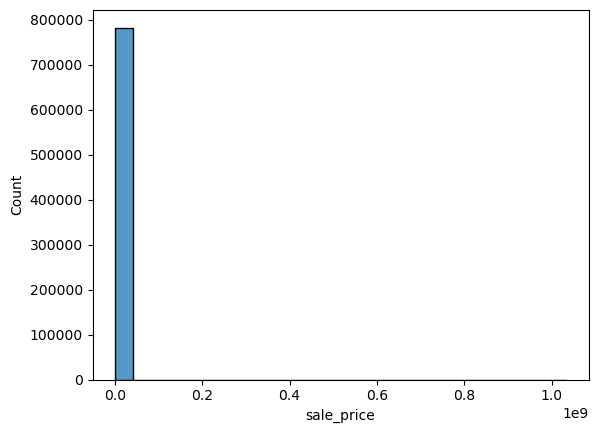

In [58]:
# Check distribution of sale_price
sns.histplot(df2['sale_price'], bins=25)

<AxesSubplot:xlabel='total_units', ylabel='Count'>

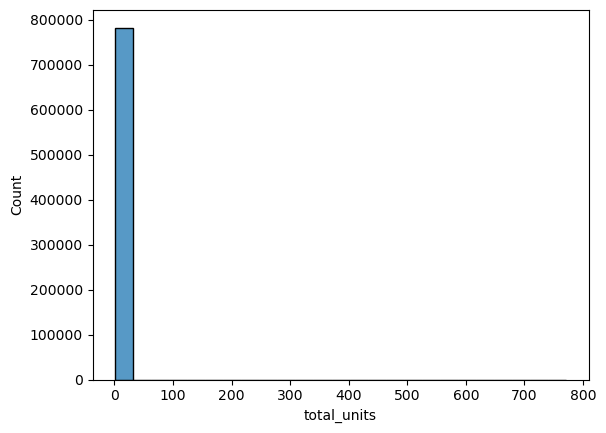

In [59]:
# Check distribution of total_units
sns.histplot(df2['total_units'], bins=25)

Text(0, 0.5, 'Sale price')

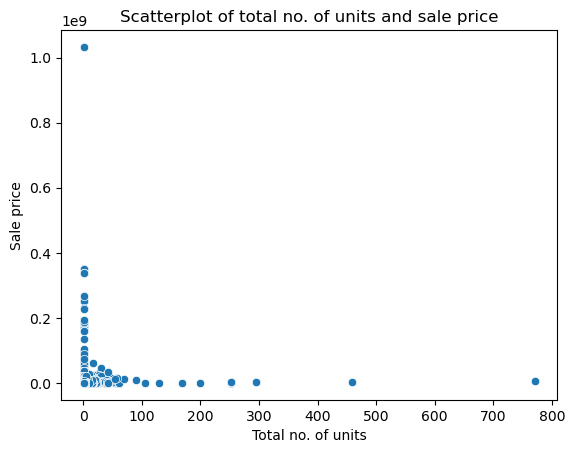

In [60]:
# Create scatterplot of total_units against sale_price
# Create plot
sns.scatterplot(data=df2, x='total_units', y='sale_price')

# Add title
plt.title('Scatterplot of total no. of units and sale price')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

From looking at the histograms and scatterplot it is highly doubtful that this second model will perform better than the first one. I'll still give it a try with the same hypothesis: The higher the total number of units in a building, the higher its price.

In [61]:
# Reshape variables into arrays
X2 = df2['total_units'].values.reshape(-1,1)
y2 = df2['sale_price'].values.reshape(-1,1)

In [62]:
# Split data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [63]:
# Create regression object
regression = LinearRegression()

In [64]:
# Fit regression object onto train sets
regression.fit(X2_train, y2_train)

LinearRegression()

In [65]:
# Predict sale_prices from test set
y2_predicted = regression.predict(X2_test)

Text(0, 0.5, 'Sale price')

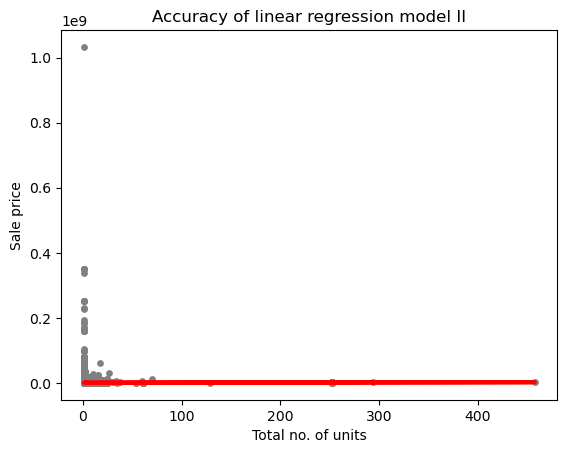

In [66]:
# Create scatterplot to visualise accuracy of regression model
# Create scatterplot with test data
plt.scatter(X2_test, y2_test, color='gray', s=15)

# Create regression line with predicted values
plt.plot(X2_test, y2_predicted, color='red', linewidth=3)

# Add title 
plt.title('Accuracy of linear regression model II')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

The regression line of the second model does not fit the datapoints of the scatterplot any better than the first model. 

In [67]:
# Get model performance statistics
rmse = mean_squared_error(y2_test, y2_predicted)
r2 = r2_score(y2_test, y2_predicted)

In [68]:
# Print model performance statistics
print('Slope :', regression.coef_)
print('Root mean squared error :', rmse)
print('R2 score :', r2)

Slope : [[3454.04678536]]
Root mean squared error : 15574008229626.447
R2 score : -9.853809900928212e-06


In [69]:
# Compare y_test to y_predicted
data = pd.DataFrame({'Actual sale_price' : y2_test.flatten(), 'Predicted sale_price' : y2_predicted.flatten()})
data.head(15)

,Actual sale_price,Predicted sale_price
0,650000.0,668072.342348
1,580000.0,664618.295563
2,900000.0,671526.389133
3,395000.0,664618.295563
4,650000.0,668072.342348
5,407000.0,664618.295563
6,520000.0,668072.342348
7,1250000.0,664618.295563
8,525000.0,664618.295563
9,500000.0,664618.295563


The second model performs even worse than the first one. While the slope indicates that there sale prices increase with higher total numbers of units, the root mean squared error of the second model is even higher pointing to a bad fit of the model. The negative R2 score is definitve proof of the model's unfitness.

I will make a third attempt to train a model that is better at predicting prices. For this purpose, I'll exclude commercial unit-sales. For this purpose, I adapt my hypothesis as follows:

The higher the number of residential units, the higher the sale price.

## 03.3 Regression analysis for residential unit-only sales

In [70]:
# Re-import original data
df3 = pd.read_pickle(os.path.join(path, '2023-05-28_df.pkl'))

In [71]:
# Get dimensions of df3
df3.shape

(1665722, 19)

In [72]:
# Get number of rows with sale_price = 0
len(df3[df3['sale_price']==0])

483934

In [73]:
# Remove ownership transfers with sale_price = 0 in preparation of building a model to predict sale prices
df3 = df3[df3['sale_price']!=0]

In [74]:
# Get shape of df3 after dropping ownership transfers
df3.shape

(1181788, 19)

In [75]:
# Check number of rows with residential_units = 0
len(df3[df3['residential_units']==0])

309295

In [76]:
# Keep only rows with values !=0 in residential_units
df3 = df3[df3['residential_units']!=0]

In [77]:
# Get shape of df3 after dropping
df3.shape

(872493, 19)

In [78]:
# Identify outliers based on IQR
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [79]:
# Identify outliers in sale_price
find_outliers_IQR(df3['sale_price'])

90          1952799.0
115         2250000.0
116         2025000.0
117         2300000.0
118         2585000.0
              ...    
1915514     2058200.0
1915659    32300524.0
1915662     6950000.0
1915663    32300524.0
1916211     1800000.0
Name: sale_price, Length: 90340, dtype: float64

In [80]:
# Identify outliers in total_units
find_outliers_IQR(df3['residential_units'])

527         8
529         4
929        72
1113        4
1114        4
           ..
1916111     6
1916118     4
1916120     5
1916137     4
1916211     9
Name: residential_units, Length: 58437, dtype: int64

In [81]:
# Define outliers for sale_price
q1 = df3['sale_price'].quantile(0.25)
q3 = df3['sale_price'].quantile(0.75)
IQR = q3-q1

# Store outliers in df3_outl_sale_price
df3_outl_sale_price = df3[((df3['sale_price']<(q1-1.5*IQR)) | (df3['sale_price']>(q3+1.5*IQR)))]

# Get dimensions of df3_outl_sale_price
df3_outl_sale_price.shape

(90340, 19)

In [82]:
# Define outliers for residential_units
q1 = df3['residential_units'].quantile(0.25)
q3 = df3['residential_units'].quantile(0.75)
IQR = q3-q1

# Store outliers in df3_outl_resid_units
df3_outl_resid_units = df3[((df3['residential_units']<(q1-1.5*IQR)) | (df3['residential_units']>(q3+1.5*IQR)))]

# Get dimensions of df3_outl_resid_units
df3_outl_resid_units.shape

(58437, 19)

In [83]:
# Create list of oulier dfs
outlier_list3 = [df3_outl_sale_price, df3_outl_resid_units]

# Concatenate outlier dfs
outliers3 = pd.concat(outlier_list3)

# Get dimensions of outlier df
outliers3.shape

(148777, 19)

In [84]:
# Drop duplicates from outliers3
outliers3.drop_duplicates(inplace=True)

# Get dimensions of outliers3 after dropping
outliers3.shape

(122268, 19)

In [85]:
# Drop outliers from df3
df3.drop(outliers3.index, axis=0, inplace=True)

# Get dimensions of df3 after dropping
df3.shape

(750225, 19)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

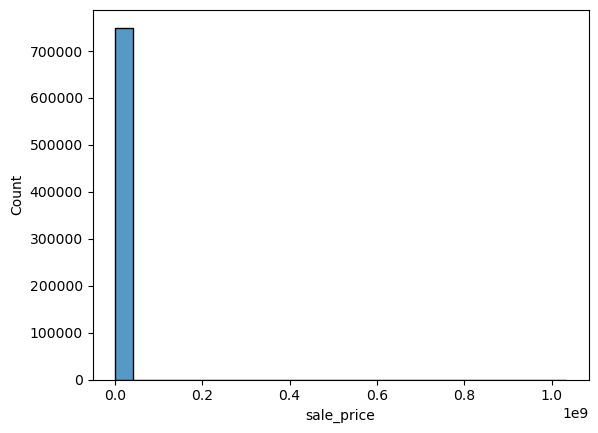

In [86]:
# Check distribution of sale_price
sns.histplot(df3['sale_price'], bins=25)

<AxesSubplot:xlabel='residential_units', ylabel='Count'>

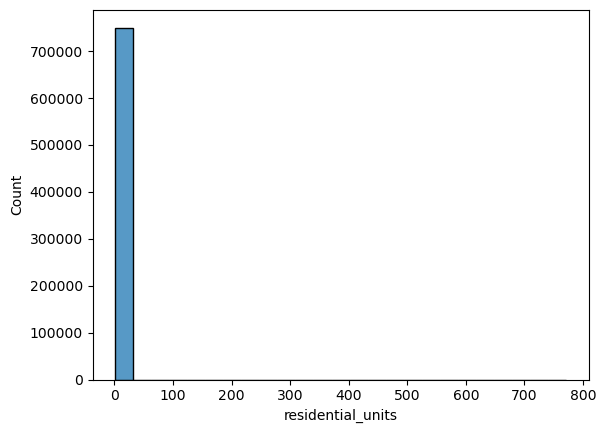

In [87]:
# Check distribution of residential_units
sns.histplot(df3['residential_units'], bins=25)

Text(0, 0.5, 'Sale price')

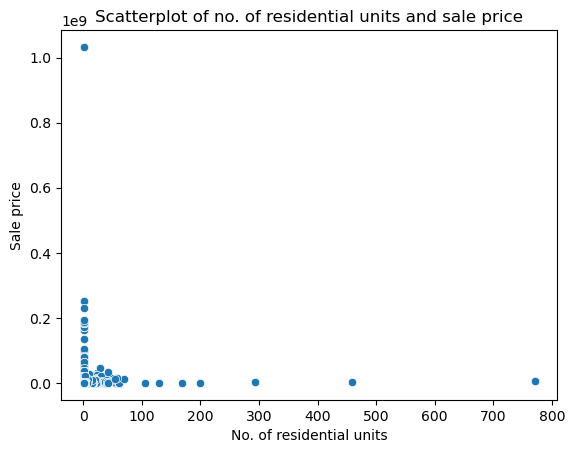

In [88]:
# Create scatterplot of residential_units against sale_price
# Create plot
sns.scatterplot(data=df3, x='residential_units', y='sale_price')

# Add title
plt.title('Scatterplot of no. of residential units and sale price')
# Add x-axis label
plt.xlabel('No. of residential units')
# Add y-axis label
plt.ylabel('Sale price')

From looking at the histograms and scatterplot it is highly doubtful that this third model will perform better than the first two. I'll still give it a try with the hypothesis stated above: The higher the number of residential units in a building, the higher its price.

In [89]:
# Reshape variables into arrays
X3 = df3['residential_units'].values.reshape(-1,1)
y3 = df3['sale_price'].values.reshape(-1,1)

In [90]:
# Split data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

In [91]:
# Create regression object
regression = LinearRegression()

In [92]:
# Fit regression object onto train sets
regression.fit(X3_train, y3_train)

LinearRegression()

In [93]:
# Predict sale_prices from test set
y3_predicted = regression.predict(X3_test)

Text(0, 0.5, 'Sale price')

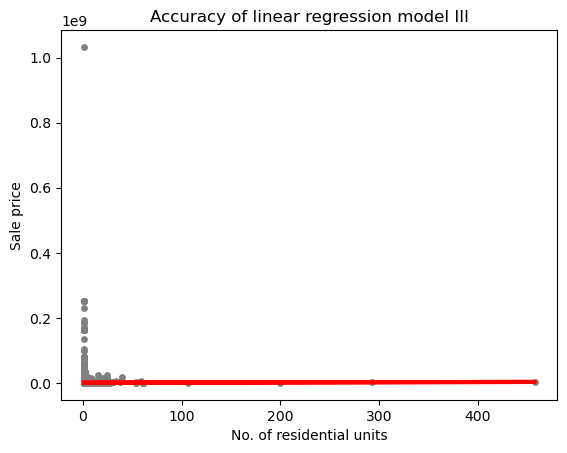

In [94]:
# Create scatterplot to visualise accuracy of regression model
# Create scatterplot with test data
plt.scatter(X3_test, y3_test, color='gray', s=15)

# Create regression line with predicted values
plt.plot(X3_test, y3_predicted, color='red', linewidth=3)

# Add title 
plt.title('Accuracy of linear regression model III')
# Add x-axis label
plt.xlabel('No. of residential units')
# Add y-axis label
plt.ylabel('Sale price')

The regression line of the third model does not fit the datapoints of the scatterplot any better than the first two models. 

In [95]:
# Get model performance statistics
rmse = mean_squared_error(y3_test, y3_predicted)
r2 = r2_score(y3_test, y3_predicted)

In [96]:
# Print model performance statistics
print('Slope :', regression.coef_)
print('Root mean squared error :', rmse)
print('R2 score :', r2)

Slope : [[5278.78102168]]
Root mean squared error : 13680979068085.621
R2 score : -2.4129196762423533e-05


In [97]:
# Compare y_test to y_predicted
data = pd.DataFrame({'Actual sale_price' : y3_test.flatten(), 'Predicted sale_price' : y3_predicted.flatten()})
data.head(15)

,Actual sale_price,Predicted sale_price
0,350000.0,664419.290653
1,399080.0,664419.290653
2,865000.0,664419.290653
3,650000.0,669698.071675
4,325000.0,659140.509631
5,613000.0,659140.509631
6,250000.0,659140.509631
7,530000.0,659140.509631
8,570000.0,664419.290653
9,436000.0,664419.290653


The third model performs a bit better than the second one, but overall it remains totally unfit to accurately predict sale prices. 

Out of curiosity, I'll make a forth attempt at training a model for sales incl. commercial units (i.e. I'll exclude any sales that do not cover at least 1 commercial unit). For this purpose, I adapt my hypothesis as follows:

For sales that include at least one commercial unit, the higher total number of units, the higher the sale price.

## 03.4 Regression analysis for sales incl. commercial units

In [98]:
# Re-import original data
df4 = pd.read_pickle(os.path.join(path, '2023-05-28_df.pkl'))

In [99]:
# Get dimensions of df4
df4.shape

(1665722, 19)

In [100]:
# Get number of rows with sale_price = 0
len(df4[df4['sale_price']==0])

483934

In [101]:
# Remove ownership transfers with sale_price = 0 in preparation of building a model to predict sale prices
df4 = df4[df4['sale_price']!=0]

In [102]:
# Get shape of df4 after dropping ownership transfers
df4.shape

(1181788, 19)

In [103]:
# Check number of rows with commercial_units = 0
len(df4[df4['commercial_units']==0])

1098321

In [104]:
# Keep only rows with values !=0 in commercial_units
df4 = df4[df4['commercial_units']!=0]

In [105]:
# Get shape of df4 after dropping
df4.shape

(83467, 19)

In [106]:
# Identify outliers based on IQR
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [107]:
# Identify outliers in sale_price
find_outliers_IQR(df4['sale_price'])

4224        6225000.0
4225       51000000.0
5427        7000000.0
6137        5800000.0
6346       45600000.0
              ...    
1914615    57044793.0
1914616    57044793.0
1914617    57044793.0
1915659    32300524.0
1916147     7500000.0
Name: sale_price, Length: 11263, dtype: float64

In [108]:
# Identify outliers in total_units
find_outliers_IQR(df4['total_units'])

6346       28
6350       15
6358        9
7298       12
7299       14
           ..
1913177    41
1914597    23
1914615    23
1915659    55
1915806     9
Name: total_units, Length: 10088, dtype: int64

In [109]:
# Define outliers for sale_price
q1 = df4['sale_price'].quantile(0.25)
q3 = df4['sale_price'].quantile(0.75)
IQR = q3-q1

# Store outliers in df4_outl_sale_price
df4_outl_sale_price = df4[((df4['sale_price']<(q1-1.5*IQR)) | (df4['sale_price']>(q3+1.5*IQR)))]

# Get dimensions of df4_outl_sale_price
df4_outl_sale_price.shape

(11263, 19)

In [110]:
# Define outliers for total_units
q1 = df4['total_units'].quantile(0.25)
q3 = df4['total_units'].quantile(0.75)
IQR = q3-q1

# Store outliers in df4_outl_total_units
df4_outl_total_units = df4[((df4['total_units']<(q1-1.5*IQR)) | (df4['total_units']>(q3+1.5*IQR)))]

# Get dimensions of df4_outl_total_units
df4_outl_total_units.shape

(10088, 19)

In [111]:
# Create list of oulier dfs
outlier_list4 = [df4_outl_sale_price, df4_outl_total_units]

# Concatenate outlier dfs
outliers4 = pd.concat(outlier_list4)

# Get dimensions of outlier df
outliers4.shape

(21351, 19)

In [112]:
# Drop duplicates from outliers4
outliers4.drop_duplicates(inplace=True)

# Get dimensions of outliers4 after dropping
outliers4.shape

(16814, 19)

In [113]:
# Drop outliers from df4
df4.drop(outliers4.index, axis=0, inplace=True)

# Get dimensions of df4 after dropping
df4.shape

(66653, 19)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

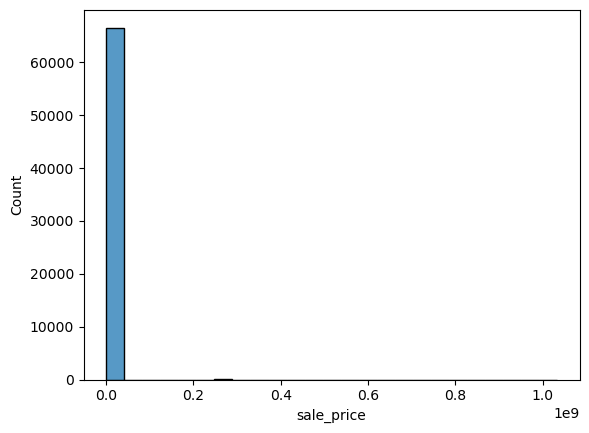

In [114]:
# Check distribution of sale_price
sns.histplot(df4['sale_price'], bins=25)

<AxesSubplot:xlabel='total_units', ylabel='Count'>

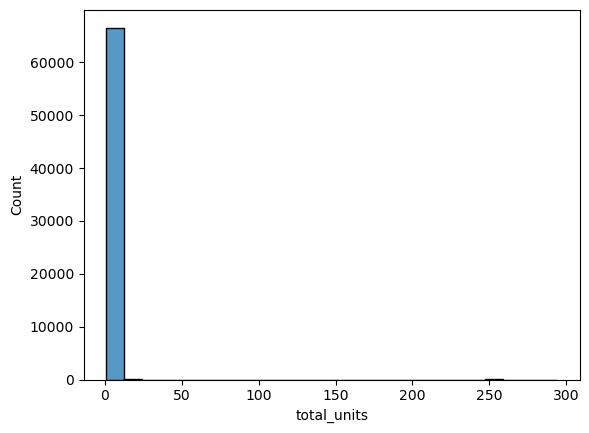

In [115]:
# Check distribution of residential_units
sns.histplot(df4['total_units'], bins=25)

Text(0, 0.5, 'Sale price')

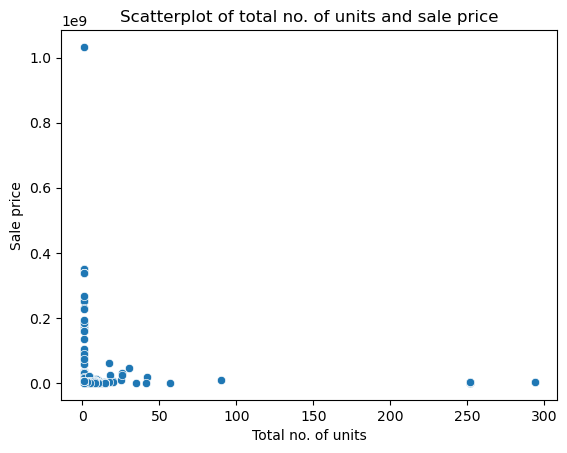

In [116]:
# Create scatterplot of total_units against sale_price
# Create plot
sns.scatterplot(data=df4, x='total_units', y='sale_price')

# Add title
plt.title('Scatterplot of total no. of units and sale price')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

From looking at the histograms and scatterplot it is highly doubtful that this forth model will perform better than the first two. I'll still give it a try with the hypothesis stated above: For sales that include at least one commercial unit, the higher total number of units, the higher the sale price.

In [117]:
# Reshape variables into arrays
X4 = df4['total_units'].values.reshape(-1,1)
y4 = df4['sale_price'].values.reshape(-1,1)

In [118]:
# Split data into train and test sets
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.3, random_state=0)

In [119]:
# Create regression object
regression = LinearRegression()

In [120]:
# Fit regression object onto train sets
regression.fit(X4_train, y4_train)

LinearRegression()

In [121]:
# Predict sale_prices from test set
y4_predicted = regression.predict(X4_test)

Text(0, 0.5, 'Sale price')

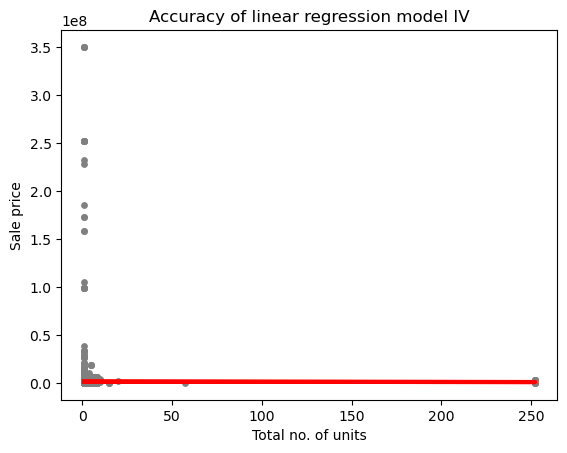

In [122]:
# Create scatterplot to visualise accuracy of regression model
# Create scatterplot with test data
plt.scatter(X4_test, y4_test, color='gray', s=15)

# Create regression line with predicted values
plt.plot(X4_test, y4_predicted, color='red', linewidth=3)

# Add title 
plt.title('Accuracy of linear regression model IV')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

The regression line of the forth model does not fit the datapoints of the scatterplot any better than the first three models. 

In [123]:
# Get model performance statistics
rmse = mean_squared_error(y4_test, y4_predicted)
r2 = r2_score(y4_test, y4_predicted)

In [124]:
# Print model performance statistics
print('Slope :', regression.coef_)
print('Root mean squared error :', rmse)
print('R2 score :', r2)

Slope : [[-1730.4820169]]
Root mean squared error : 67414860478713.55
R2 score : 8.681504426677478e-06


In [125]:
# Compare y_test to y_predicted
data = pd.DataFrame({'Actual sale_price' : y4_test.flatten(), 'Predicted sale_price' : y4_predicted.flatten()})
data.head(15)

,Actual sale_price,Predicted sale_price
0,1227429.0,1.338199e+06
1,1400000.0,1.338199e+06
2,10.0,1.338199e+06
3,2750000.0,1.338199e+06
4,1410000.0,1.336468e+06
5,43995.0,1.336468e+06
6,127281.0,1.336468e+06
7,1000000.0,1.338199e+06
8,720000.0,1.334738e+06
9,825000.0,1.334738e+06


The forth model does not perform any better than the previous one. The slope this time suggests that the higher the total number of units, the lower the price. This is highly doubtful. 
The root mean squared error for the forth model is higher than for any of the previous models indicating that the regression line does not fit the datapoints well. While the R2 score for this model is no longer negative, it is extremely small, showing that the model fails to predict more than 99% of the values accurately.

In conclusion, the number of units in a building, irrespective of residential or commercial, does not make for a good predictor of sale prices when removing outliers only based on statistical concepts such as IQR or empirical rule. This can be due to missing data (many zero values which could point to missing data had to be excluded), but it can also mean that the number of units really has a much lesser effect on sale prices than other factors such as a buildings location or its tax class.

To see whether the number of units can perform well as a predictor of sale prices, only the segment of data points will be used that has a maximum total number of units of 100.

## 03.5 Regression analysis for segment of datapoints with max. number of total units 100 and max. sale price 250,000,000

In [126]:
# Re-import original data
df5 = pd.read_pickle(os.path.join(path, '2023-05-28_df.pkl'))

In [127]:
# Get dimensions of df5
df5.shape

(1665722, 19)

In [128]:
# Get number of rows with sale_price = 0
len(df5[df5['sale_price']==0])

483934

In [129]:
# Remove ownership transfers with sale_price = 0 in preparation of building a model to predict sale prices
df5 = df5[df5['sale_price']!=0]

In [130]:
# Get shape of df5 after dropping ownership transfers
df5.shape

(1181788, 19)

In [131]:
# Check number of rows with total_units = 0
len(df5[df5['total_units']==0])

260008

In [132]:
# Keep only rows with values !=0 in total_units
df5 = df5[df5['total_units']!=0]

In [133]:
# Get shape of df5 after dropping
df5.shape

(921780, 19)

Text(0, 0.5, 'Sale price')

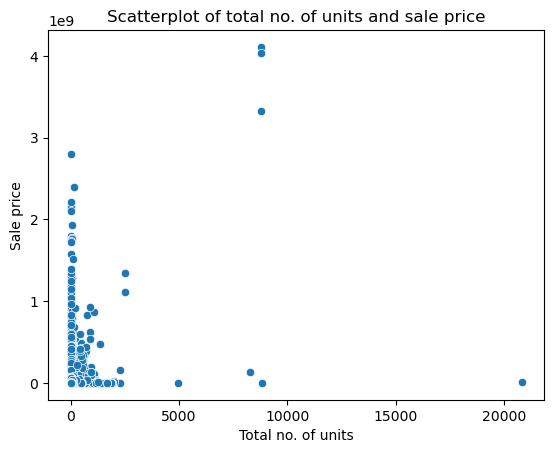

In [134]:
# Create scatterplot of total_units against sale_price to confirm segment maximum
# Create plot
sns.scatterplot(data=df5, x='total_units', y='sale_price')

# Add title
plt.title('Scatterplot of total no. of units and sale price')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

This scatterplot does not allow for confirmation of of a maximum value of 100 as good maximum value to define the segment of datapoints to be used for the regression analysis. Outliers will be removed based on IQR before a second scatterplot is created to confirm the maximum valus of total units for the datapoint segment.

In [135]:
# Identify outliers based on IQR
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [136]:
# Identify outliers in sale_price
find_outliers_IQR(df5['sale_price'])

90         1952799.0
115        2250000.0
116        2025000.0
117        2300000.0
118        2585000.0
             ...    
1915806    3900000.0
1916147    7500000.0
1916150    4947000.0
1916151    4947000.0
1916211    1800000.0
Name: sale_price, Length: 101652, dtype: float64

In [137]:
# Identify outliers in total_units
find_outliers_IQR(df5['total_units'])

527         8
529         4
530         4
929        72
932         5
           ..
1916111     6
1916118     4
1916120     5
1916137     5
1916211     9
Name: total_units, Length: 67601, dtype: int64

In [138]:
# Define outliers for sale_price
q1 = df5['sale_price'].quantile(0.25)
q3 = df5['sale_price'].quantile(0.75)
IQR = q3-q1

# Store outliers in df5_outl_sale_price
df5_outl_sale_price = df5[((df5['sale_price']<(q1-1.5*IQR)) | (df5['sale_price']>(q3+1.5*IQR)))]

# Get dimensions of df5_outl_sale_price
df5_outl_sale_price.shape

(101652, 19)

In [139]:
# Define outliers for total_units
q1 = df5['total_units'].quantile(0.25)
q3 = df5['total_units'].quantile(0.75)
IQR = q3-q1

# Store outliers in df5_outl_tot_units
df5_outl_tot_units = df5[((df5['total_units']<(q1-1.5*IQR)) | (df5['total_units']>(q3+1.5*IQR)))]

# Get dimensions of df5_outl_tot_units
df5_outl_tot_units.shape

(67601, 19)

In [140]:
# Create list of oulier dfs
outlier_list5 = [df5_outl_sale_price, df5_outl_tot_units]

# Concatenate outlier dfs
outliers5 = pd.concat(outlier_list5)

# Get dimensions of outlier df
outliers5.shape

(169253, 19)

In [141]:
# Drop duplicates from outliers5
outliers5.drop_duplicates(inplace=True)

# Get dimensions of outliers5 after dropping
outliers5.shape

(138616, 19)

In [142]:
# Drop outliers from df5
df5.drop(outliers5.index, axis=0, inplace=True)

# Get dimensions of df5 after dropping
df5.shape

(783164, 19)

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

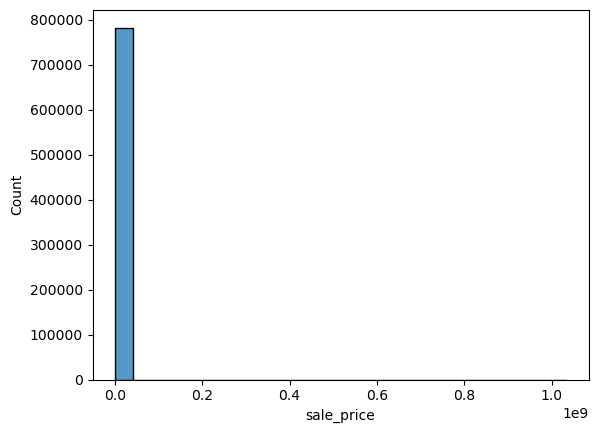

In [143]:
# Check distribution of sale_price
sns.histplot(df5['sale_price'], bins=25)

<AxesSubplot:xlabel='total_units', ylabel='Count'>

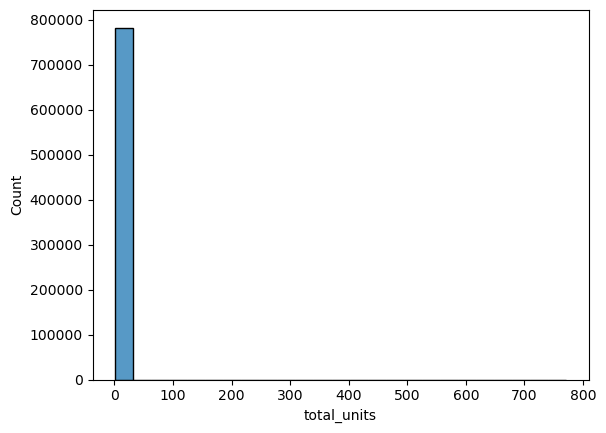

In [144]:
# Check distribution of total_units
sns.histplot(df5['total_units'], bins=25)

Text(0, 0.5, 'Sale price')

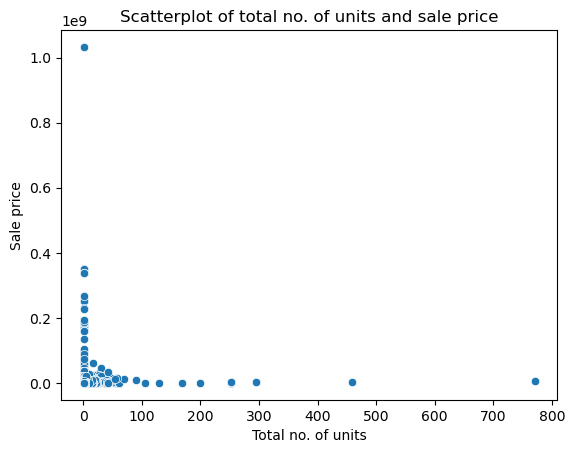

In [145]:
# Create scatterplot of total_units against sale_price to confirm segment maximum
# Create plot
sns.scatterplot(data=df5, x='total_units', y='sale_price')

# Add title
plt.title('Scatterplot of total no. of units and sale price')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

The scatterplot confirms that a maximum number of total units of 100 is a good value to look at a segment of the dataframes with a high density of datapoints. However, the scatterplot shows that it may also be necessary to identify a maximum sale price to receive a functioning model. The maximum sale price will be set to 250,000,000 US$.

In [146]:
# Get shape of df5 before removal of values >100 for total number of units and >250,000,000 for sale price
df5.shape

(783164, 19)

In [147]:
# Get number of observations with total_units >100
len(df5[df5['total_units']>100])

58

In [149]:
# Get number of observations with sale_price >250,000,000
len(df5[df5['sale_price']>250000000])

40

In [150]:
# Drop observations with total_units >100
df5 = df5[df5['total_units']<= 100]

In [151]:
# Drop observations with sale_price >250,000,000
df5 = df5[df5['sale_price'] <= 250000000]

In [152]:
# Get shape of df5 after dropping 
df5.shape

(783066, 19)

In [153]:
# Reshape variables into arrays
X5 = df5['total_units'].values.reshape(-1,1)
y5 = df5['sale_price'].values.reshape(-1,1)

In [154]:
# Split data into train and test sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3, random_state=0)

In [155]:
# Create regression object
regression = LinearRegression()

In [156]:
# Fit regression object onto train sets
regression.fit(X5_train, y5_train)

LinearRegression()

In [157]:
# Predict sale_prices from test set
y5_predicted = regression.predict(X5_test)

Text(0, 0.5, 'Sale price')

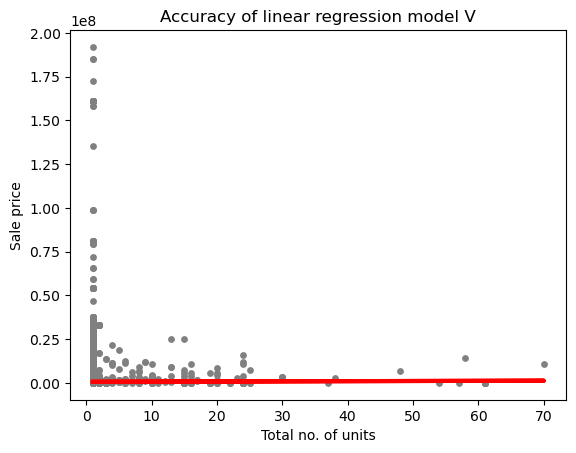

In [158]:
# Create scatterplot to visualise accuracy of regression model
# Create scatterplot with test data
plt.scatter(X5_test, y5_test, color='gray', s=15)

# Create regression line with predicted values
plt.plot(X5_test, y5_predicted, color='red', linewidth=3)

# Add title 
plt.title('Accuracy of linear regression model V')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

The regression line of the fifth model does not fit the datapoints of the scatterplot a lot better. It may be worth another try with a stricter segment of datapoints such as maximum total_units 50 and maximum sale_price 100,000,000.

In [159]:
# Get model performance statistics
rmse = mean_squared_error(y5_test, y5_predicted)
r2 = r2_score(y5_test, y5_predicted)

In [160]:
# Print model performance statistics
print('Slope :', regression.coef_)
print('Root mean squared error :', rmse)
print('R2 score :', r2)

Slope : [[9174.84890323]]
Root mean squared error : 5895485391284.941
R2 score : -2.9738990357186523e-05


In [161]:
# Compare y_test to y_predicted
data = pd.DataFrame({'Actual sale_price' : y5_test.flatten(), 'Predicted sale_price' : y5_predicted.flatten()})


data.head(15)

,Actual sale_price,Predicted sale_price
0,250000.0,649643.189818
1,715000.0,658818.038721
2,738271.0,649643.189818
3,10.0,667992.887625
4,536000.0,649643.189818
5,165000.0,649643.189818
6,1650000.0,658818.038721
7,712367.0,658818.038721
8,1365000.0,649643.189818
9,461370.0,649643.189818


The fifth model does not perform well either. While the slope indicates that sale prices increase with higher total numbers of units, the root mean squared error is very high, pointing to a bad fit of the model. The negative R2 score confirms this. 

As stated above, another attempt will be made with a segment of datapoints reduced to a maximum value for total_units of 50 and a maximum sale_price of 100,000,000. The hypothesis remains unchanged: The higher the total number of units, the higher the sale price. 

## 03.6 Regression analysis for segment of datapoints with max. number of total units 50 and max. sale price 100,000,000

In [162]:
# Define df for ensuing regression analysis
df6 = df5

In [163]:
# Get dimensions of df6
df6.shape

(783066, 19)

In [165]:
# Get number of observations with total_units > 50
len(df6[df6['total_units']>50])

39

In [166]:
# Get number of observations with sale_price > 100,000,000
len(df6[df6['sale_price']>100000000])

129

In [167]:
# Drop observations with total_units > 50
df6 = df6[df6['total_units']<= 50]

In [168]:
# Drop observations with sale_price > 100,000,000
df6 = df6[df6['sale_price']<100000000]

In [169]:
# Get dimensions of df6 after dropping
df6.shape

(782898, 19)

In [170]:
# Reshape variables into arrays
X6 = df6['total_units'].values.reshape(-1,1)
y6 = df6['sale_price'].values.reshape(-1,1)

In [171]:
# Split data into train and test sets
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3, random_state=0)

In [172]:
# Create regression object
regression = LinearRegression()

In [173]:
# Fit regression object onto train sets
regression.fit(X6_train, y6_train)

LinearRegression()

In [174]:
# Predict sale_prices from test set
y6_predicted = regression.predict(X6_test)

Text(0, 0.5, 'Sale price')

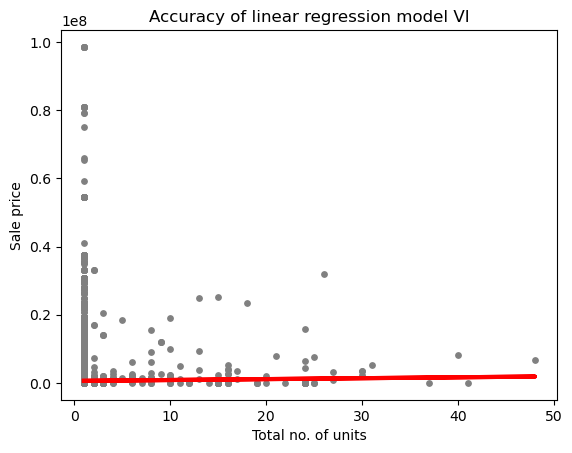

In [175]:
# Create scatterplot to visualise accuracy of regression model
# Create scatterplot with test data
plt.scatter(X6_test, y6_test, color='gray', s=15)

# Create regression line with predicted values
plt.plot(X6_test, y6_predicted, color='red', linewidth=3)

# Add title 
plt.title('Accuracy of linear regression model VI')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

The regression line of the sixth model does not really fit the datapoints of the scatterplot a lot better. It may be worth another try with an even stricter segment of datapoints for which the maximum total_units remains 50 and the maximum sale_price remains 100,000,000, but additionally, there is a mimimum number of units set to 2 (i.e. excluding any properties with only one unit).

In [176]:
# Get model performance statistics
rmse = mean_squared_error(y6_test, y6_predicted)
r2 = r2_score(y6_test, y6_predicted)

In [177]:
# Print model performance statistics
print('Slope :', regression.coef_)
print('Root mean squared error :', rmse)
print('R2 score :', r2)

Slope : [[26675.78434801]]
Root mean squared error : 1875547431948.5825
R2 score : -0.0002460299733342275


In [178]:
# Compare y_test to y_predicted
data = pd.DataFrame({'Actual sale_price' : y6_test.flatten(), 'Predicted sale_price' : y6_predicted.flatten()})

# Print head of data
data.head(15)

,Actual sale_price,Predicted sale_price
0,225000.0,612946.614361
1,870000.0,612946.614361
2,700000.0,612946.614361
3,90000.0,639622.398709
4,330274.0,612946.614361
5,990000.0,639622.398709
6,1680000.0,666298.183057
7,257800.0,612946.614361
8,380200.0,612946.614361
9,275000.0,639622.398709


Even though the sixth model does perform a bit better than the previous one, it does not perform well either. While the slope indicates that sale prices increase with higher total numbers of units, the root mean squared error is still very high, pointing to a bad fit of the model. The negative R2 score confirms this. 

As stated above, another attempt will be made with a segment of datapoints reduced to a maximum value for total_units of 50 and a maximum sale_price of 100,000,000, and additionally a minimum value of total_units of 2. The hypothesis remains unchanged: The higher the total number of units, the higher the sale price. 

## 03.7 Regresstion analysis for segment of datapoints with max. number of total units 50, minimum number of total units 2, and max. sale price 100,000,000

In [179]:
# Define df for ensuing regression analysis
df7 = df6

In [180]:
# Get dimensions of df7
df7.shape

(782898, 19)

In [182]:
# Get number of observations with total_units <2
len(df7[df7['total_units']<2])

488591

In [183]:
# Drop observations with total_units <2
df7 = df7[df7['total_units']>=2]

In [184]:
# Get dimensions of df7 after dropping
df7.shape

(294307, 19)

In [185]:
# Reshape variables into arrays
X7 = df7['total_units'].values.reshape(-1,1)
y7 = df7['sale_price'].values.reshape(-1,1)

In [186]:
# Split data into train and test sets
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size=0.3, random_state=0)

In [187]:
# Create regression object
regression = LinearRegression()

In [188]:
# Fit regression object onto train sets
regression.fit(X7_train, y7_train)

LinearRegression()

In [189]:
# Predict sale_prices from test set
y7_predicted = regression.predict(X7_test)

Text(0, 0.5, 'Sale price')

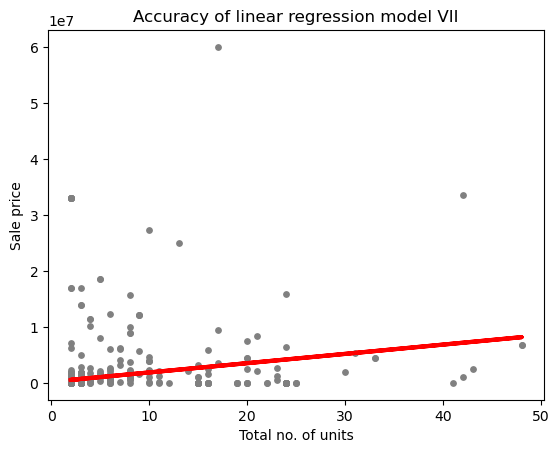

In [190]:
# Create scatterplot to visualise accuracy of regression model
# Create scatterplot with test data
plt.scatter(X7_test, y7_test, color='gray', s=15)

# Create regression line with predicted values
plt.plot(X7_test, y7_predicted, color='red', linewidth=3)

# Add title 
plt.title('Accuracy of linear regression model VII')
# Add x-axis label
plt.xlabel('Total no. of units')
# Add y-axis label
plt.ylabel('Sale price')

The regression line of the seventh model does not fit the datapoints of the scatterplot very well, but from purely looking at its visualisation, it seems to perform a lot better than any of the previous models. 

In [191]:
# Get model performance statistics
rmse = mean_squared_error(y7_test, y7_predicted)
r2 = r2_score(y7_test, y7_predicted)

In [192]:
# Print model performance statistics
print('Slope :', regression.coef_)
print('Root mean squared error :', rmse)
print('R2 score :', r2)

Slope : [[165820.72097384]]
Root mean squared error : 310975745746.95917
R2 score : 0.030297795713527642


In [193]:
# Compare y_test to y_predicted
data = pd.DataFrame({'Actual sale_price' : y7_test.flatten(), 'Predicted sale_price' : y7_predicted.flatten()})

# Print head of data
data.head(15)

,Actual sale_price,Predicted sale_price
0,1150000.0,708104.573173
1,496954.0,708104.573173
2,46000.0,542283.852199
3,650000.0,708104.573173
4,200000.0,708104.573173
5,242100.0,708104.573173
6,489000.0,542283.852199
7,166666.0,542283.852199
8,585000.0,542283.852199
9,498000.0,542283.852199


The seventh model performs best compared to all previous models. The slope indicates that there is a positive relationship between total number of units and sale price. However, the root mean squared error remains large and the R2 score is still reltively close to 0, both indicating a poor fit of the model. 

In conclusion, it can be stated that while the number of units could be one aspect defining sale prices, there must be other aspects that contribute to a property's sale prices. This could be a property's location, its age, its tax class etc. A good model would have to take them into account in order to accurately predict sale prices. 

Also, it must be noted that there are significant gaps in the data which make it difficult to come up with a good, functioning model to accurately predict sale prices. For many sales, the number of units is indicated as zero (residential, commercial or total), and the size in gross square feet is often below the size in land square feet despite the glossary defining gross square feet as “the total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.”